In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [8]:
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
data=engine.execute ('SELECT * FROM station')
for record in data:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
columns=inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
# session.query("select * from measurement").all()
data=engine.execute ('SELECT * FROM measurement')
# for record in data:
#     print(record)
columns=inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])
# data.columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [18]:
data=engine.execute('SELECT max (date) FROM measurement')
for record in data:
    print(record)

('2017-08-23',)


Text(0, 0.5, 'precipitation in inches')

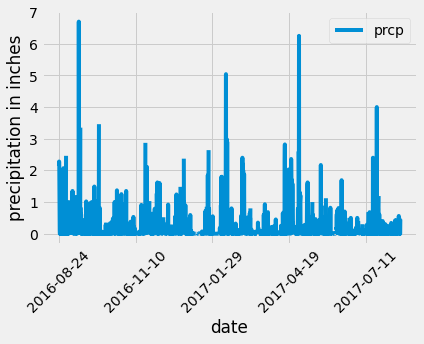

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
pre_year=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precp=engine.execute(f'SELECT * from measurement where date> "2016-08-23"')

# Save the query results as a Pandas DataFrame and set the index to the date column
df2017=pd.DataFrame(precp, columns=['id', 'station', 'date', 'prcp', 'tobs'])

# Sort the dataframe by date
df2017=df2017.sort_values("date")
df2017

# Use Pandas Plotting with Matplotlib to plot the data
df2017.plot(x='date', y='prcp', rot=45)
plt.ylabel('precipitation in inches')


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df2017['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
stat=engine.execute(f'SELECT count (*) as count from station')
for record in stat:
    print(record)

(9,)


In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count=engine.execute('select count (*) as count, station from measurement group by station order by count desc')
for record in count:
    print(record)

(2772, 'USC00519281')
(2724, 'USC00519397')
(2709, 'USC00513117')
(2669, 'USC00519523')
(2612, 'USC00516128')
(2202, 'USC00514830')
(1979, 'USC00511918')
(1372, 'USC00517948')
(511, 'USC00518838')


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp=engine.execute('select max(tobs) as max, min(tobs)as min, avg(tobs) as avg from measurement where station ="USC00519281"')
for record in temp:
    print(record)

(85.0, 54.0, 71.66378066378067)


Text(0.5, 0, 'temp')

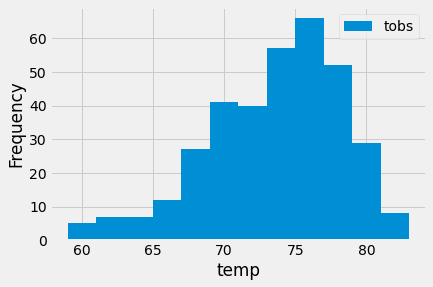

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stattemp=engine.execute(f'SELECT tobs from measurement where date> "2016-08-23" AND station="USC00519281"')
dfstation=pd.DataFrame(stattemp, columns=['tobs'])
dfstation.plot.hist(bins=12)
plt.xlabel('temp')

# Close session

In [25]:
# Close Session
session.close()